In [4]:
import os
os.getcwd()

# Change directory to main repository directory in order to install modules
os.chdir(f"{os.environ['HOME']}/Code/jwst/")

In [5]:
import numpy as np

from astropy.io import fits
from matplotlib import pyplot as plt

In [6]:
outdir_s2 = "/data/typhon2/hattie/jwst/wasp_96/pipeline_outputs_directory/Stage2/"
data_filenames = [
    outdir_s2 + "jw02734002001_04101_00001-seg001_nis_badpixstep.fits",
    outdir_s2 + "jw02734002001_04101_00001-seg002_nis_badpixstep.fits",
    outdir_s2 + "jw02734002001_04101_00001-seg003_nis_badpixstep.fits",
]

In [7]:
data = []
for filename in data_filenames:
    with fits.open(filename) as hdulist:
        data.append(hdulist[1].data)

data = np.concatenate(data, axis=0)


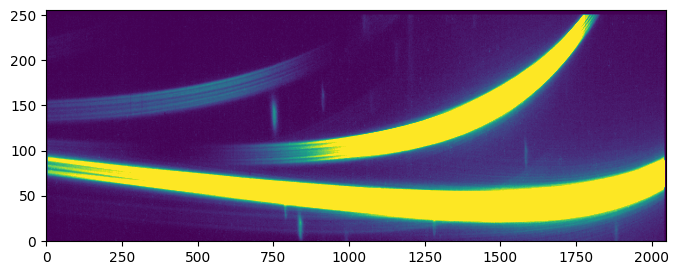

In [8]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.imshow(data[0], aspect='auto', origin='lower', vmin=0, vmax=10)

In [9]:
# split data into 80:10:10 % train:val:test
number_data_points = data.shape[0]
number_train_points = int(0.8 * number_data_points)
number_validation_points = int(0.1 * number_data_points)
number_test_points = number_data_points - number_train_points - number_validation_points

train_data = data[:number_train_points]
validation_data = data[number_train_points:number_train_points + number_validation_points]
test_data = data[number_train_points + number_validation_points:]

print(f"Number of training data points: {number_train_points}")
print(f"Number of validation data points: {number_validation_points}")
print(f"Number of test data points: {number_test_points}")

Number of training data points: 224
Number of validation data points: 28
Number of test data points: 28


In [11]:
for data_set, name in zip([train_data, validation_data, test_data], ["train", "validation", "test"]):
    for index, spectra in enumerate(data_set):
        plt.imsave(f"data/{name}/data/spectra_{index}.png", spectra)